## Support Vector Machine (SVM)
------------------------------------------------

In [ ]:
# Importações
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Mini Tarefa

 * Carregue o DataFrame Boston
 * Normaliza o DataFrame Boston

In [ ]:
# Carregando Boston dataset
from sklearn.datasets import load_boston
boston = load_boston()

# Normalizando os dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(boston.data)

dados_normalizados = scaler.transform(boston.data)
dados_normalizados

In [ ]:
# Fazendo um  DataFrame
df = pd.DataFrame(dados_normalizados)
df.columns = boston.feature_names
df['PRICE'] = boston.target
df.head()
X = df.drop('PRICE',axis=1)
y = df['PRICE']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [ ]:
from sklearn import svm
svr = svm.SVR()
svr.fit(X_train,y_train)


In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = svr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print('rmse:{}'.format(rmse))

In [ ]:
# Ajustando SVR (Tunning)
from sklearn.model_selection import GridSearchCV
svr = svm.SVR()
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
grid = GridSearchCV(svr, param_grid,cv=10,scoring='neg_mean_squared_error')
grid.fit(X_train,y_train)
#grid.cv_results_
grid.best_params_


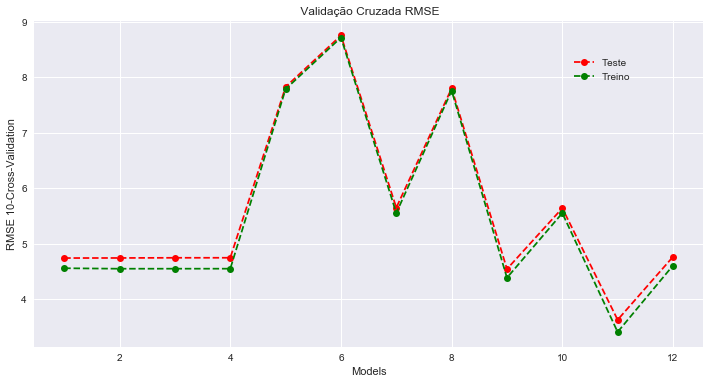

In [25]:
# Erros de Teste
mea_cv_test = grid.cv_results_['mean_test_score']
rmse_cv_test = np.sqrt(np.abs(mea_cv_test))
# Erros de Treino
mea_cv_train = grid.cv_results_['mean_train_score']
rmse_cv_train = np.sqrt(np.abs(mea_cv_train))
# Eixos dos X
parm_c = grid.cv_results_['param_C'].data
n_model = np.arange(1,len(parm_c)+1)
# Fazendo o Gráfico
plt.figure(figsize=(12,6))
plt.plot(n_model,rmse_cv_test,marker='o',linestyle='--',color='red')
plt.plot(n_model,rmse_cv_train,marker='o',linestyle='--',color='green')
plt.legend(['Teste','Treino'],loc=(0.8,0.8))
plt.title(" Validação Cruzada RMSE")
plt.xlabel('Models')
plt.ylabel('RMSE 10-Cross-Validation')

In [27]:
rmse_cv_train

array([ 4.55471117,  4.5457404 ,  4.54633522,  4.54635617,  7.78391337,
        8.71381556,  5.55043849,  7.75533135,  4.38285941,  5.54800985,
        3.40556278,  4.60370024])